## Q1:

In [1]:
import numpy as np

class LinearRegression:
    def __init__(self):
        self.coef_ = None
        self.intercept_ = None
    
    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)
        X_b = np.c_[np.ones((X.shape[0], 1)), X]  
        theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
        self.intercept_ = theta_best[0]
        self.coef_ = theta_best[1:]
    
    def predict(self, X):
        X = np.array(X)
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        return X_b.dot(np.r_[self.intercept_, self.coef_])

## Q3:

In [39]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.exceptions import ConvergenceWarning
import warnings

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

class CustomLogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        num_samples, num_features = X.shape
        self.weights = np.zeros(num_features)
        self.bias = 0

        for _ in range(self.num_iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = sigmoid(linear_model)

            dw = (1 / num_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / num_samples) * np.sum(y_predicted - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = sigmoid(linear_model)
        y_predicted_class = [1 if i > 0.5 else 0 for i in y_predicted]
        return np.array(y_predicted_class)

data = load_breast_cancer()
X = data.data
y = data.target
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.3, random_state=42)

custom_log_reg = CustomLogisticRegression(learning_rate=0.01, num_iterations=10000)
custom_log_reg.fit(X_train, y_train)

y_pred_custom = custom_log_reg.predict(X_test)

accuracy_custom = accuracy_score(y_test, y_pred_custom)
print("Custom Logistic Regression Accuracy:", accuracy_custom)

print("Custom Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_custom))

print("Custom Logistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_custom))

# Define a function to train and evaluate sklearn Logistic Regression models with different penalties
def train_and_evaluate_sklearn_log_reg(penalty):
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=ConvergenceWarning)
        
        if penalty in ['l1', 'elasticnet']:
            solver = 'saga'  
        else:
            solver = 'lbfgs'

        if penalty is None:
            log_reg = LogisticRegression(penalty=None, solver=solver, max_iter=10000, random_state=42)
        elif penalty == 'elasticnet':
            log_reg = LogisticRegression(penalty=penalty, solver=solver, max_iter=10000, random_state=42, l1_ratio=0.5)
        else:
            log_reg = LogisticRegression(penalty=penalty, solver=solver, max_iter=10000, random_state=42)

        log_reg.fit(X_train, y_train)
        y_pred = log_reg.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        return accuracy, y_pred

# Penalties to try
penalties = [None, 'l2', 'l1', 'elasticnet']

# Train and evaluate sklearn models with different penalties
best_accuracy = 0
best_penalty = None
best_y_pred = None

for penalty in penalties:
    accuracy, y_pred = train_and_evaluate_sklearn_log_reg(penalty)
    print(f"Sklearn Logistic Regression (penalty={penalty}) Accuracy: {accuracy}")
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_penalty = penalty
        best_y_pred = y_pred

# Print classification report for the best sklearn model
print(f"Best Sklearn Logistic Regression Model (penalty={best_penalty}) Classification Report:")
print(classification_report(y_test, best_y_pred))

# Print confusion matrix for the best sklearn model
print(f"Best Sklearn Logistic Regression Model (penalty={best_penalty}) Confusion Matrix:")
print(confusion_matrix(y_test, best_y_pred))


Custom Logistic Regression Accuracy: 0.9532163742690059
Custom Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.90      0.93        63
           1       0.95      0.98      0.96       108

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171

Custom Logistic Regression Confusion Matrix:
[[ 57   6]
 [  2 106]]
Sklearn Logistic Regression (penalty=None) Accuracy: 0.9473684210526315
Sklearn Logistic Regression (penalty=l2) Accuracy: 0.9766081871345029
Sklearn Logistic Regression (penalty=l1) Accuracy: 0.9649122807017544
Sklearn Logistic Regression (penalty=elasticnet) Accuracy: 0.9766081871345029
Best Sklearn Logistic Regression Model (penalty=l2) Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        63
           1       0.96  

## Q2:

In [67]:
import pandas as pd
import numpy as np
data= pd.read_csv(r"C:\Users\Shobhan Sarkar\OneDrive\Desktop\ACM SIGCHI\Real estate.csv")

In [68]:
data.head(10)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
5,6,2012.667,7.1,2175.03000,3,24.96305,121.51254,32.1
6,7,2012.667,34.5,623.47310,7,24.97933,121.53642,40.3
7,8,2013.417,20.3,287.60250,6,24.98042,121.54228,46.7
8,9,2013.500,31.7,5512.03800,1,24.95095,121.48458,18.8
9,10,2013.417,17.9,1783.18000,3,24.96731,121.51486,22.1


In [69]:
data.tail()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5
413,414,2013.500,6.5,90.45606,9,24.97433,121.54310,63.9


In [77]:
columns =data.columns
columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [78]:
print(df.isnull().sum())

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64


In [80]:
df.columns = df.columns.str.strip()

# Print the cleaned column names
print("Column names after cleaning:")
print(df.columns)

# Get the column names
columns = df.columns


Column names after cleaning:
Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')


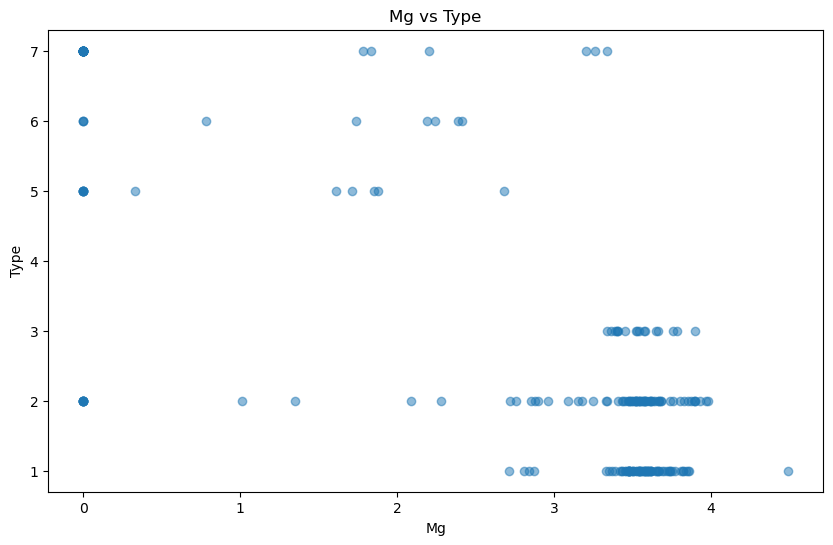

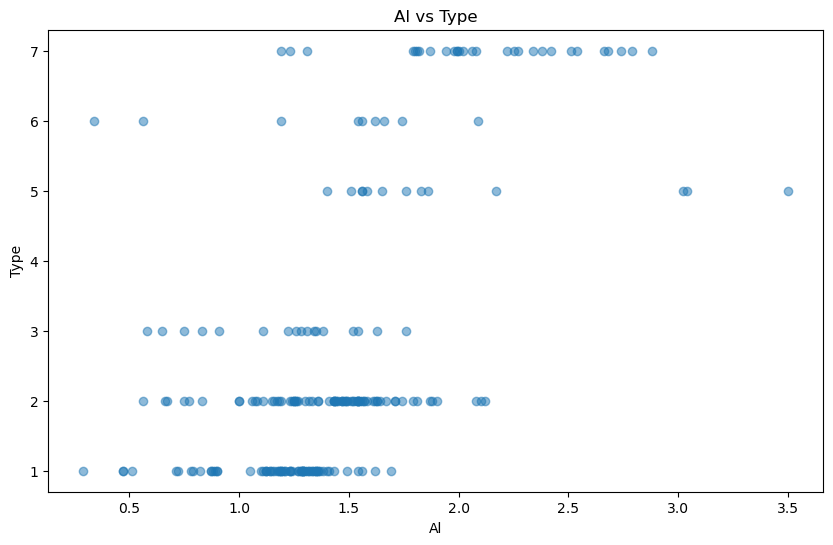

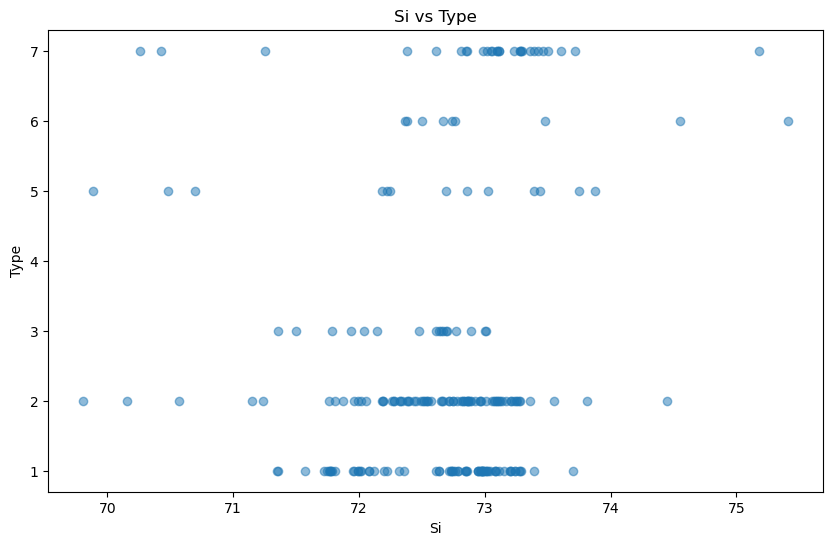

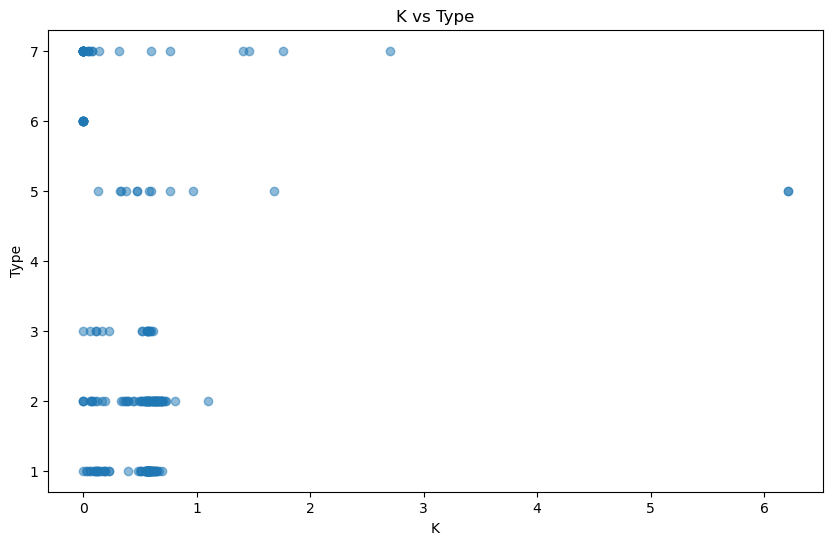

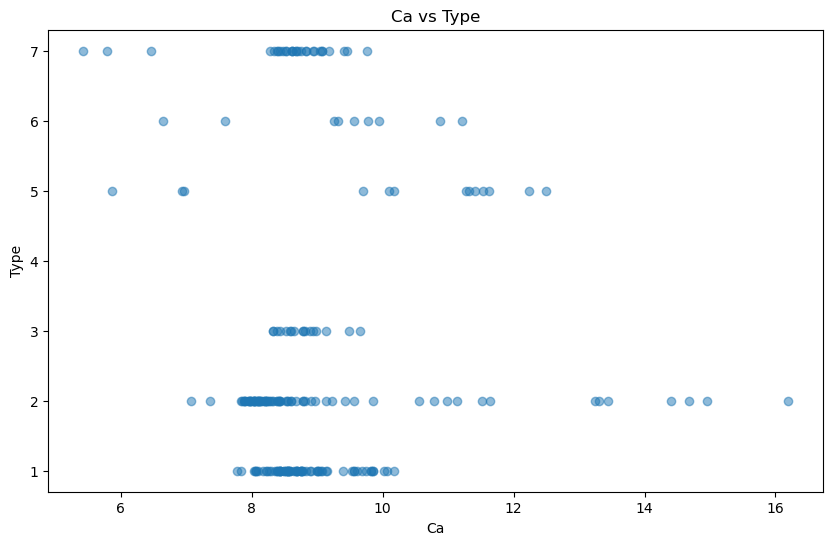

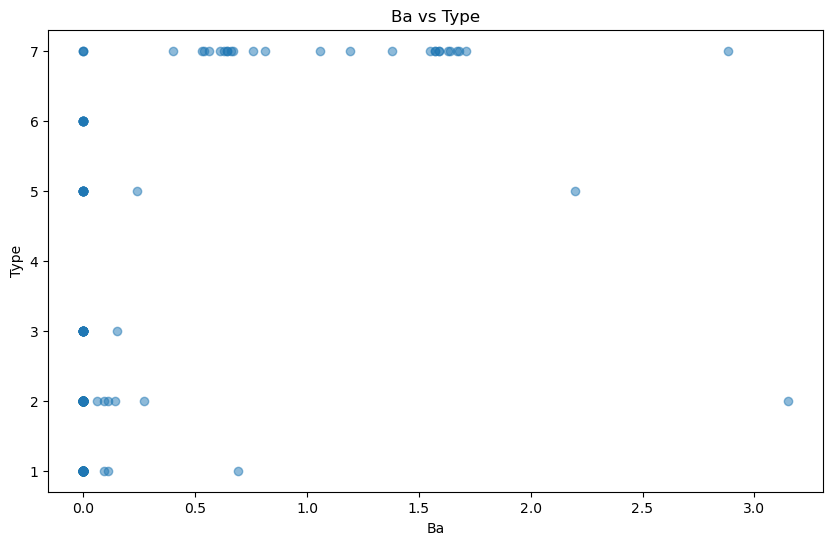

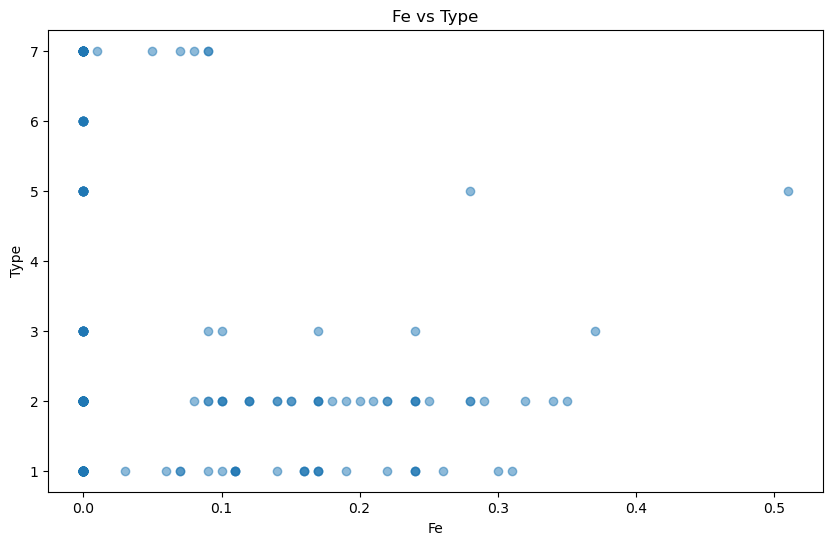

In [81]:
import matplotlib.pyplot as plt
for col in columns[2:-1]:
    plt.figure(figsize=(10, 6))
    plt.scatter(df[col], df[columns[-1]], alpha=0.5)
    plt.title(f'{col} vs {columns[-1]}')
    plt.xlabel(col)
    plt.ylabel(columns[-1])
    plt.show()


Column names after cleaning:
Index(['Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe'], dtype='object')


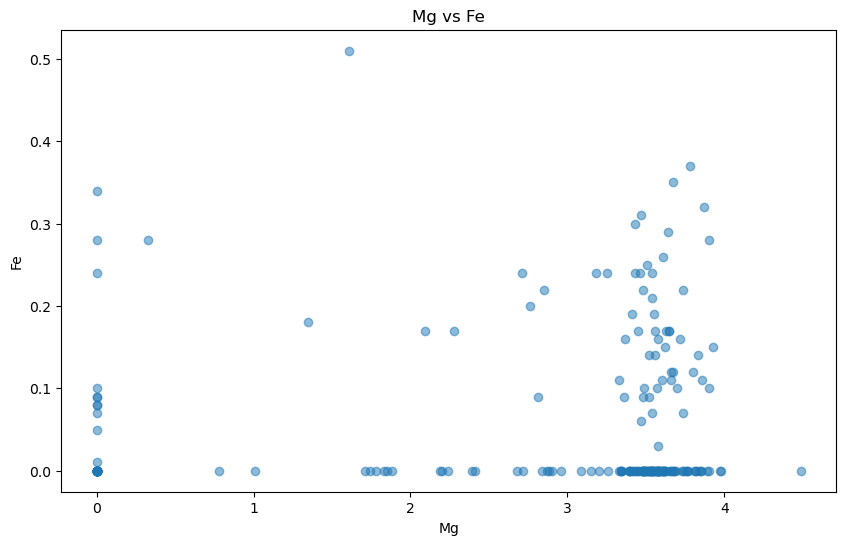

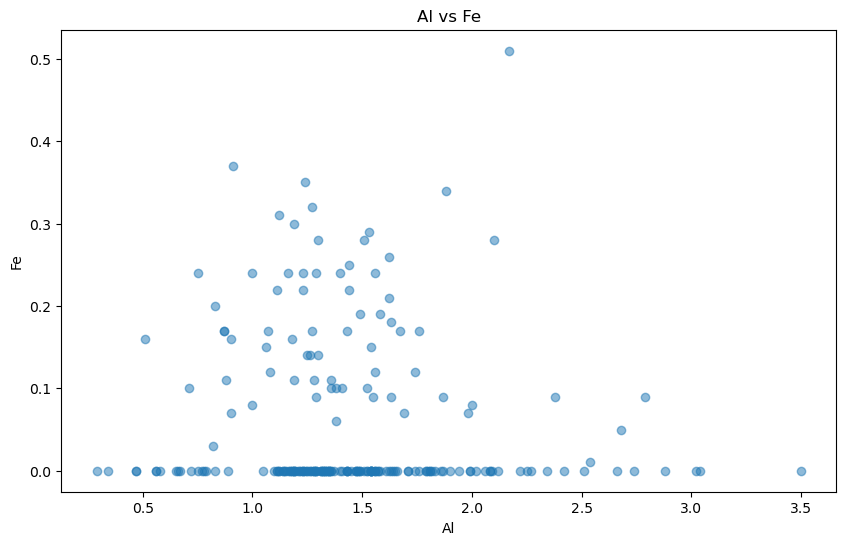

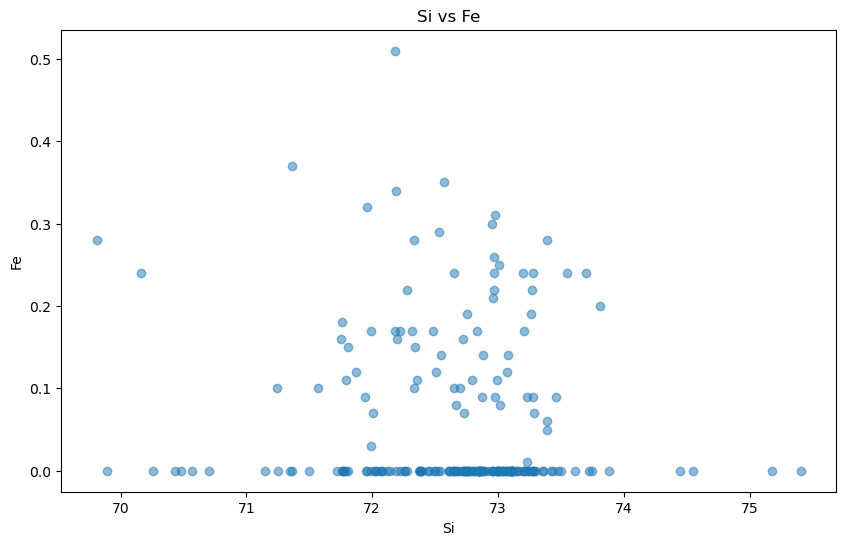

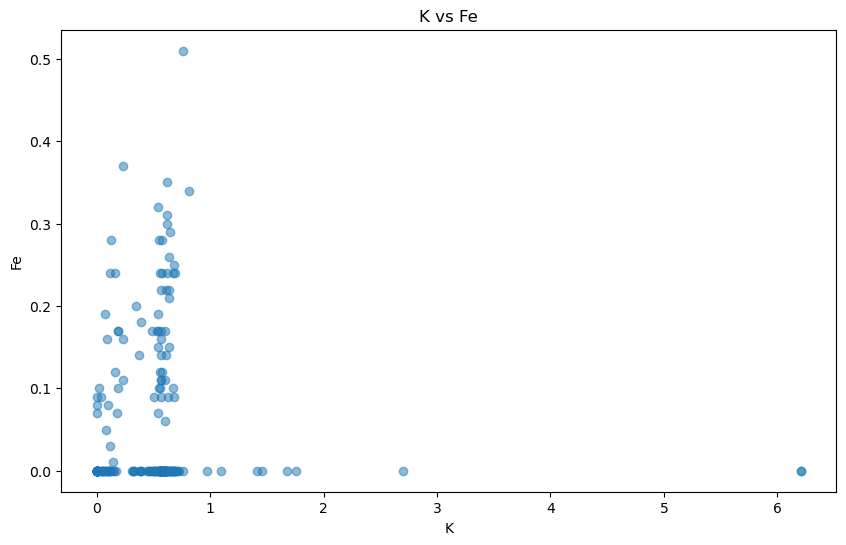

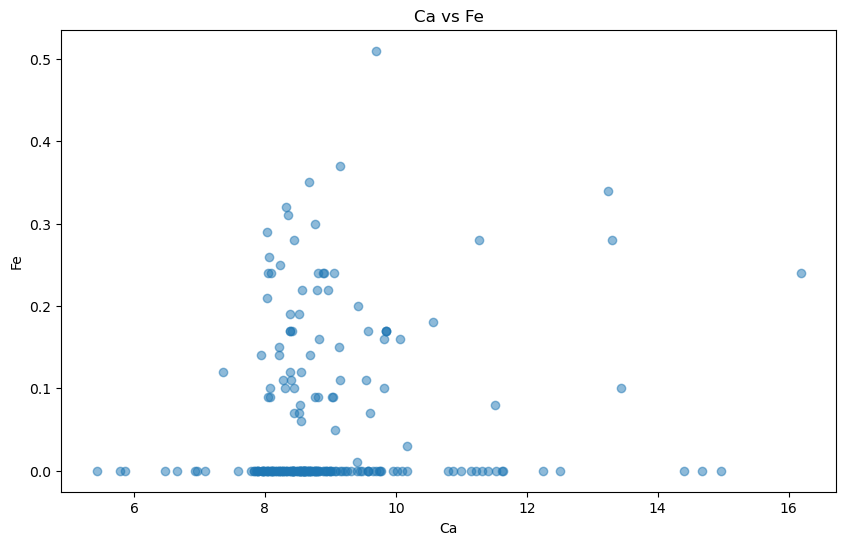

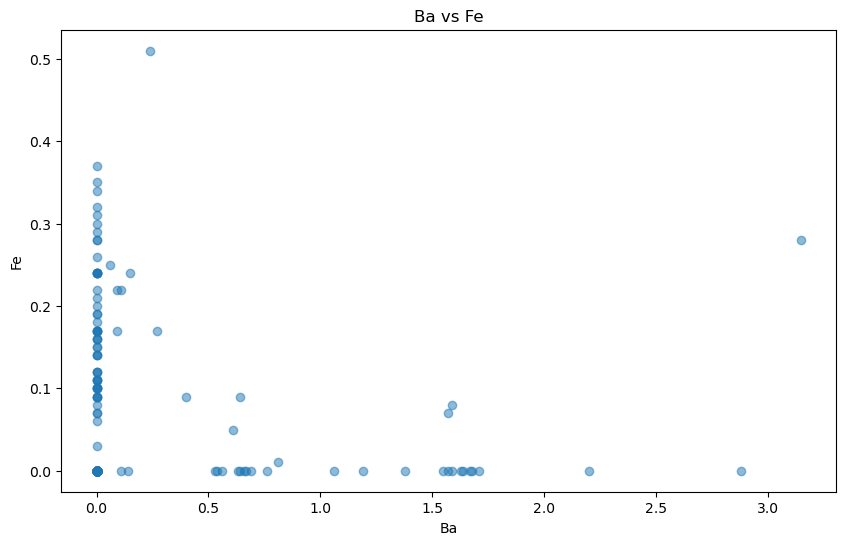

DataFrame before dropping unwanted columns:
      Na    Mg    Al     Si     K    Ca   Ba   Fe
0  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0
1  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0
2  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0
3  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0
4  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0


In [85]:
df.columns = df.columns.str.strip()

# Print the cleaned column names
print("Column names after cleaning:")
print(df.columns)

# Get the column names
columns = df.columns

# Plot the column values against the target column (last column)
target_column = columns[-1]
for col in columns[1:-1]:
    plt.figure(figsize=(10, 6))
    plt.scatter(df[col], df[target_column], alpha=0.5)
    plt.title(f'{col} vs {target_column}')
    plt.xlabel(col)
    plt.ylabel(target_column)
    plt.show()

# Print the DataFrame before dropping columns
print("DataFrame before dropping unwanted columns:")
print(df.head())

In [90]:
from sklearn.model_selection import train_test_split
class LinearRegression:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
    
    def fit(self, X, y):
        X = np.insert(X, 0, 1, axis=1) 
        self.theta = np.zeros(X.shape[1])
        m = len(y)
        
        for _ in range(self.epochs):
            predictions = X.dot(self.theta)
            errors = predictions - y
            gradients = X.T.dot(errors) / m
            self.theta -= self.learning_rate * gradients
    
    def predict(self, X):
        X = np.insert(X, 0, 1, axis=1)  
        return X.dot(self.theta)
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
custom_lr = LinearRegression()
custom_lr.fit(X_train_scaled, y_train)

y_pred_custom = custom_lr.predict(X_test_scaled)


In [91]:
from sklearn.metrics import mean_squared_error, r2_score
mse_custom = mean_squared_error(y_test, y_pred_custom)
r2_custom = r2_score(y_test, y_pred_custom)
print(f'Custom Linear Regression - MSE: {mse_custom}, R²: {r2_custom}')


Custom Linear Regression - MSE: 0.006852625883460084, R²: 0.027722018481431965


In [92]:
from sklearn.linear_model import LinearRegression as SklearnLinearRegression
sklearn_lr = SklearnLinearRegression()
sklearn_lr.fit(X_train_scaled, y_train)
y_pred_sklearn = sklearn_lr.predict(X_test_scaled)
mse_sklearn = mean_squared_error(y_test, y_pred_sklearn)
r2_sklearn = r2_score(y_test, y_pred_sklearn)

print(f'Sklearn Linear Regression - MSE: {mse_sklearn}, R²: {r2_sklearn}')


Sklearn Linear Regression - MSE: 0.006970309511369886, R²: 0.01102459443584125


## Q4:

In [41]:
df = pd.read_csv(r"C:\Users\Shobhan Sarkar\OneDrive\Desktop\ACM SIGCHI\glass.csv")

In [42]:
df.head(10)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
6,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
7,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1
8,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,1
9,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11,1


In [56]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

X = df.drop(columns=['Type'])
y = df['Type']
import numpy as np

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))


In [57]:
class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return np.array(predictions)

    def _predict(self, x):
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        most_common = np.bincount(k_nearest_labels).argmax()
        return most_common


In [66]:
X = np.array(X)
y = np.array(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
knn = KNN(k=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of custom KNN model: {accuracy:.4f}")

Accuracy of custom KNN model: 0.6462


In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

knn = KNeighborsClassifier(3)

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.6461538461538462
Classification Report:
              precision    recall  f1-score   support

           1       0.57      0.68      0.62        19
           2       0.71      0.65      0.68        23
           3       0.40      0.50      0.44         4
           5       1.00      0.50      0.67         6
           6       0.25      0.33      0.29         3
           7       0.89      0.80      0.84        10

    accuracy                           0.65        65
   macro avg       0.64      0.58      0.59        65
weighted avg       0.68      0.65      0.65        65

Confusion Matrix:
[[13  3  3  0  0  0]
 [ 6 15  0  0  2  0]
 [ 2  0  2  0  0  0]
 [ 1  2  0  3  0  0]
 [ 0  1  0  0  1  1]
 [ 1  0  0  0  1  8]]
